In [70]:
from library.utils import SYSTEM_NAMES, SUBFOLDERS, load_datasets

In [71]:
import matplotlib.pyplot as plt

In [72]:
import pandas as pd
import numpy as np

In [73]:
# Select the main folder 
%cd /mnt/data/vieri/projects/SAMPLE/

# Visualize names of PV systems
print(SYSTEM_NAMES, "-->", SUBFOLDERS)
# --- 0 ---------- 1 ---------- 2 --------- 3 ---------- 4 -------- (for ALL) ------- (For SOL 1, SOL 2 & GALATINA) ---------

/mnt/data/vieri/projects/SAMPLE
['Binetto 1', 'Binetto 2', 'Soleto 1', 'Soleto 2', 'Galatina'] --> ['Cleaned', '1-hour sampling', '1-hour averaged sampling']


# Select the PV System

In [74]:
system_name = SYSTEM_NAMES[2]
print(f"PV SYSTEM --> {system_name}")

PV SYSTEM --> Soleto 1


# Loading the dataset

In [75]:
# Loading the datasets
system_path, inv_data, inv_names, *_ = load_datasets(system_name, subfolder = "1-hour averaged sampling")

-------------------------------------------------------------------------------- 
				PV SYSTEM --> SOLETO 1 
--------------------------------------------------------------------------------

Loading inverter data...
SOLETO 1: OK, component data loaded (4) --> INV1, INV2, INV3, INV4
-------------------------------------------------------------------------------- 
FINISHED!: All datasets have been loaded. (SYS: 4 - IRR FILE: 0)
--------------------------------------------------------------------------------
-------------------------------------------------------------------------------- 
EXAMPLE --> Soleto 1: INV1 (FROM '2018-08-08' TO '2021-06-30': 1057 days).
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15586 entries, 0 to 15585
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date/Tim

# Various changes

In [76]:
for inv_name in inv_names:
    df = inv_data[inv_name]
    
    # Compute the power --> P = V * A --> Power = Voltage * Ampere
    power = df["Vcc 1 (V)"] * df["Cc 1 (A)"]
    
    # Transform the WATT (W) into KILOWATT (kW)
    kilowatt = power / 1000
    df.insert(11, "DC Power (kW)", kilowatt)
    print(f"\n{inv_name}: Added the computed column 'DC Power (kW)' in the data (i.e., P = V *A ).")
    
    # Columns to drops 
    columns_to_drop = [
        "Allarme",
#        "Humidity (%)",
        "Atmospheric Pressure (hPa)",
        "Rainfall (mm)",
        "Wind speed (m/s)",
        "Wind direction (°)"
    ] 
    inv_data[inv_name] = df.drop(columns = columns_to_drop)
    print(f"{inv_name}: Delated {len(columns_to_drop)} colums:", ", ".join(columns_to_drop))


INV1: Added the computed column 'DC Power (kW)' in the data (i.e., P = V *A ).
INV1: Delated 5 colums: Allarme, Atmospheric Pressure (hPa), Rainfall (mm), Wind speed (m/s), Wind direction (°)

INV2: Added the computed column 'DC Power (kW)' in the data (i.e., P = V *A ).
INV2: Delated 5 colums: Allarme, Atmospheric Pressure (hPa), Rainfall (mm), Wind speed (m/s), Wind direction (°)

INV3: Added the computed column 'DC Power (kW)' in the data (i.e., P = V *A ).
INV3: Delated 5 colums: Allarme, Atmospheric Pressure (hPa), Rainfall (mm), Wind speed (m/s), Wind direction (°)

INV4: Added the computed column 'DC Power (kW)' in the data (i.e., P = V *A ).
INV4: Delated 5 colums: Allarme, Atmospheric Pressure (hPa), Rainfall (mm), Wind speed (m/s), Wind direction (°)


In [77]:
for inv_name in inv_names:
    df = inv_data[inv_name]

    # Set the indexes
    df.index = df["Date/Time"]
    df.drop(columns="Date/Time", inplace=True)

    # Consider all the columns apart from the one concerning the AC/DC voltages
    columns = df.columns.tolist()
    columns_to_not_cosider = ["Vac R (V)", "Vac S (V)", "Vac T (V)", "Vcc 1 (V)"]
    [columns.remove(column) for column in columns_to_not_cosider]
    
    inv_data[inv_name] = df[columns] 

# Data Detrending

In [8]:
for inv_name in inv_names[:1]:
    df = inv_data[inv_name]
    
    df.info()
    display(df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15586 entries, 2018-08-08 11:00:00 to 2021-06-30 22:00:00
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Iac R (A)            15586 non-null  int64  
 1   Iac S (A)            15586 non-null  int64  
 2   Iac T (A)            15586 non-null  int64  
 3   Pac R (kW)           15586 non-null  int64  
 4   E. totale (kWh)      15586 non-null  float64
 5   Cc 1 (A)             15586 non-null  int64  
 6   DC Power (kW)        15586 non-null  float64
 7   Inverter temp. (°C)  15586 non-null  int64  
 8   Irradiance (W/mq)    15586 non-null  int64  
 9   Amb. Temp (°C)       15586 non-null  float64
 10  Humidity (%)         15087 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 1.4 MB


,Iac R (A),Iac S (A),Iac T (A),Pac R (kW),E. totale (kWh),Cc 1 (A),DC Power (kW),Inverter temp. (°C),Irradiance (W/mq),Amb. Temp (°C),Humidity (%)
Date/Time,,,,,,,,,,,
2018-08-08 11:00:00,436,419,412,150,2.963936e+06,401,155.588,31,1037,35.80,23.73
2018-08-08 12:00:00,464,449,440,160,2.964033e+06,439,166.820,32,1056,35.72,25.46
2018-08-08 13:00:00,501,483,473,172,2.964188e+06,485,180.420,35,1049,36.34,26.37
2018-08-08 14:00:00,497,481,472,170,2.964383e+06,477,179.352,35,1050,35.34,30.41
2018-08-08 15:00:00,273,266,261,94,2.964518e+06,265,99.640,34,993,33.35,35.40
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30 18:00:00,127,126,123,43,3.907287e+06,112,45.248,37,219,35.00,32.63
2021-06-30 19:00:00,68,68,67,23,3.907324e+06,64,25.984,37,133,32.88,44.55
2021-06-30 20:00:00,11,10,10,4,3.907337e+06,11,4.488,37,48,29.10,73.56


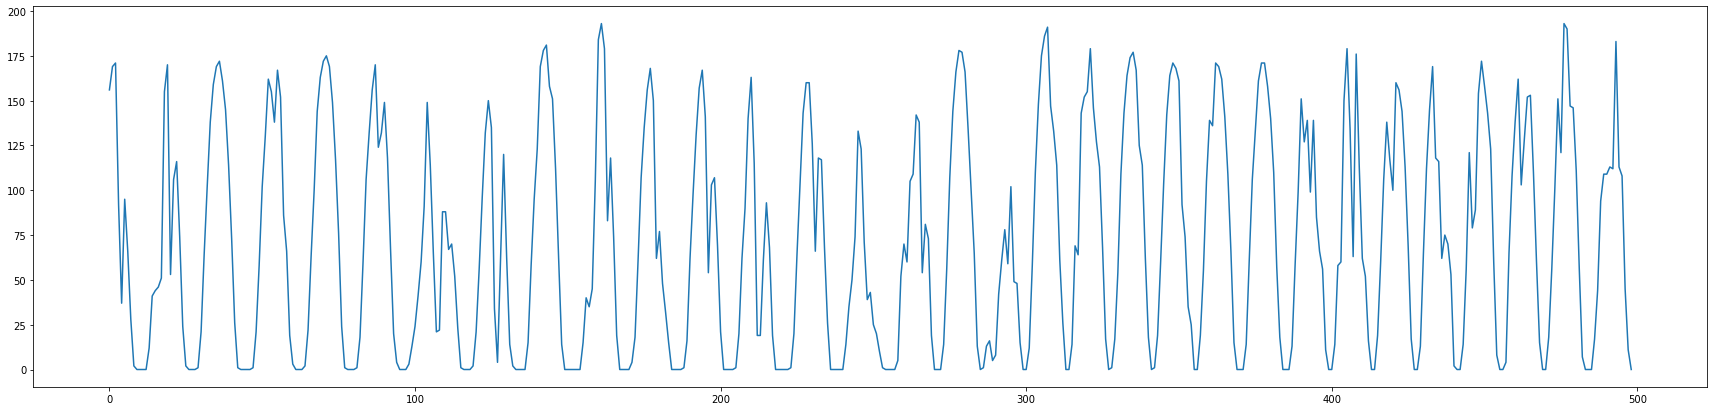

In [182]:
plt.rcParams.update({'figure.figsize': (30,7)})
n = 500
plt.plot(df['Pac R (kW)'].iloc[1:n,].values)

## inspect data components

,Iac R (A),Iac S (A),Iac T (A),Vac R (V),Vac S (V),Vac T (V),Pac R (kW),E. totale (kWh),Cc 1 (A),Vcc 1 (V),...,Pac_detrend_12,Pac_detrend_24,Pac_detrend_1w,Pac_detrend_4w,Pac_12_detrend_mean,Pac_24_detrend_mean,Pac_1w_detrend_mean,Pac_4w_detrend_mean,seasonal_difference_1m,P detrended 1m
Date/Time,,,,,,,,,,,,,,,,,,,,,
2018-08-08 11:00:00,400,425,417,117,118,117,147,2.965222e+06,396,413,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.257004,150.257004
2018-08-08 12:00:00,431,449,442,117,117,117,156,2.965316e+06,440,398,...,4.500000,4.500000,4.500000,4.500000,2.250000,2.250000,2.250000,2.250000,0.525458,155.474542
2018-08-08 13:00:00,472,482,476,117,117,117,169,2.965469e+06,478,395,...,11.666667,11.666667,11.666667,11.666667,5.388889,5.388889,5.388889,5.388889,-2.593536,171.593536
2018-08-08 14:00:00,481,491,483,117,117,116,171,2.965658e+06,487,394,...,10.250000,10.250000,10.250000,10.250000,6.604167,6.604167,6.604167,6.604167,-6.937766,177.937766
2018-08-08 15:00:00,258,266,260,116,116,116,92,2.965792e+06,258,399,...,-55.000000,-55.000000,-55.000000,-55.000000,-5.716667,-5.716667,-5.716667,-5.716667,-12.832819,104.832819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30 18:00:00,137,131,135,116,114,114,47,4.002595e+06,118,429,...,-31.583333,-10.411765,-22.680672,-25.329832,19.784722,-13.910035,0.168844,-1.808528,-2.592411,49.592411
2021-06-30 19:00:00,76,73,75,115,114,114,26,4.002636e+06,68,441,...,-54.083333,-31.294118,-43.899160,-46.023109,20.138889,-12.948097,0.434291,-2.105073,0.276547,25.723453
2021-06-30 20:00:00,14,13,14,115,113,114,5,4.002652e+06,13,450,...,-73.166667,-52.294118,-64.924370,-66.737395,16.319444,-11.871972,0.500953,-2.379925,0.310305,4.689695


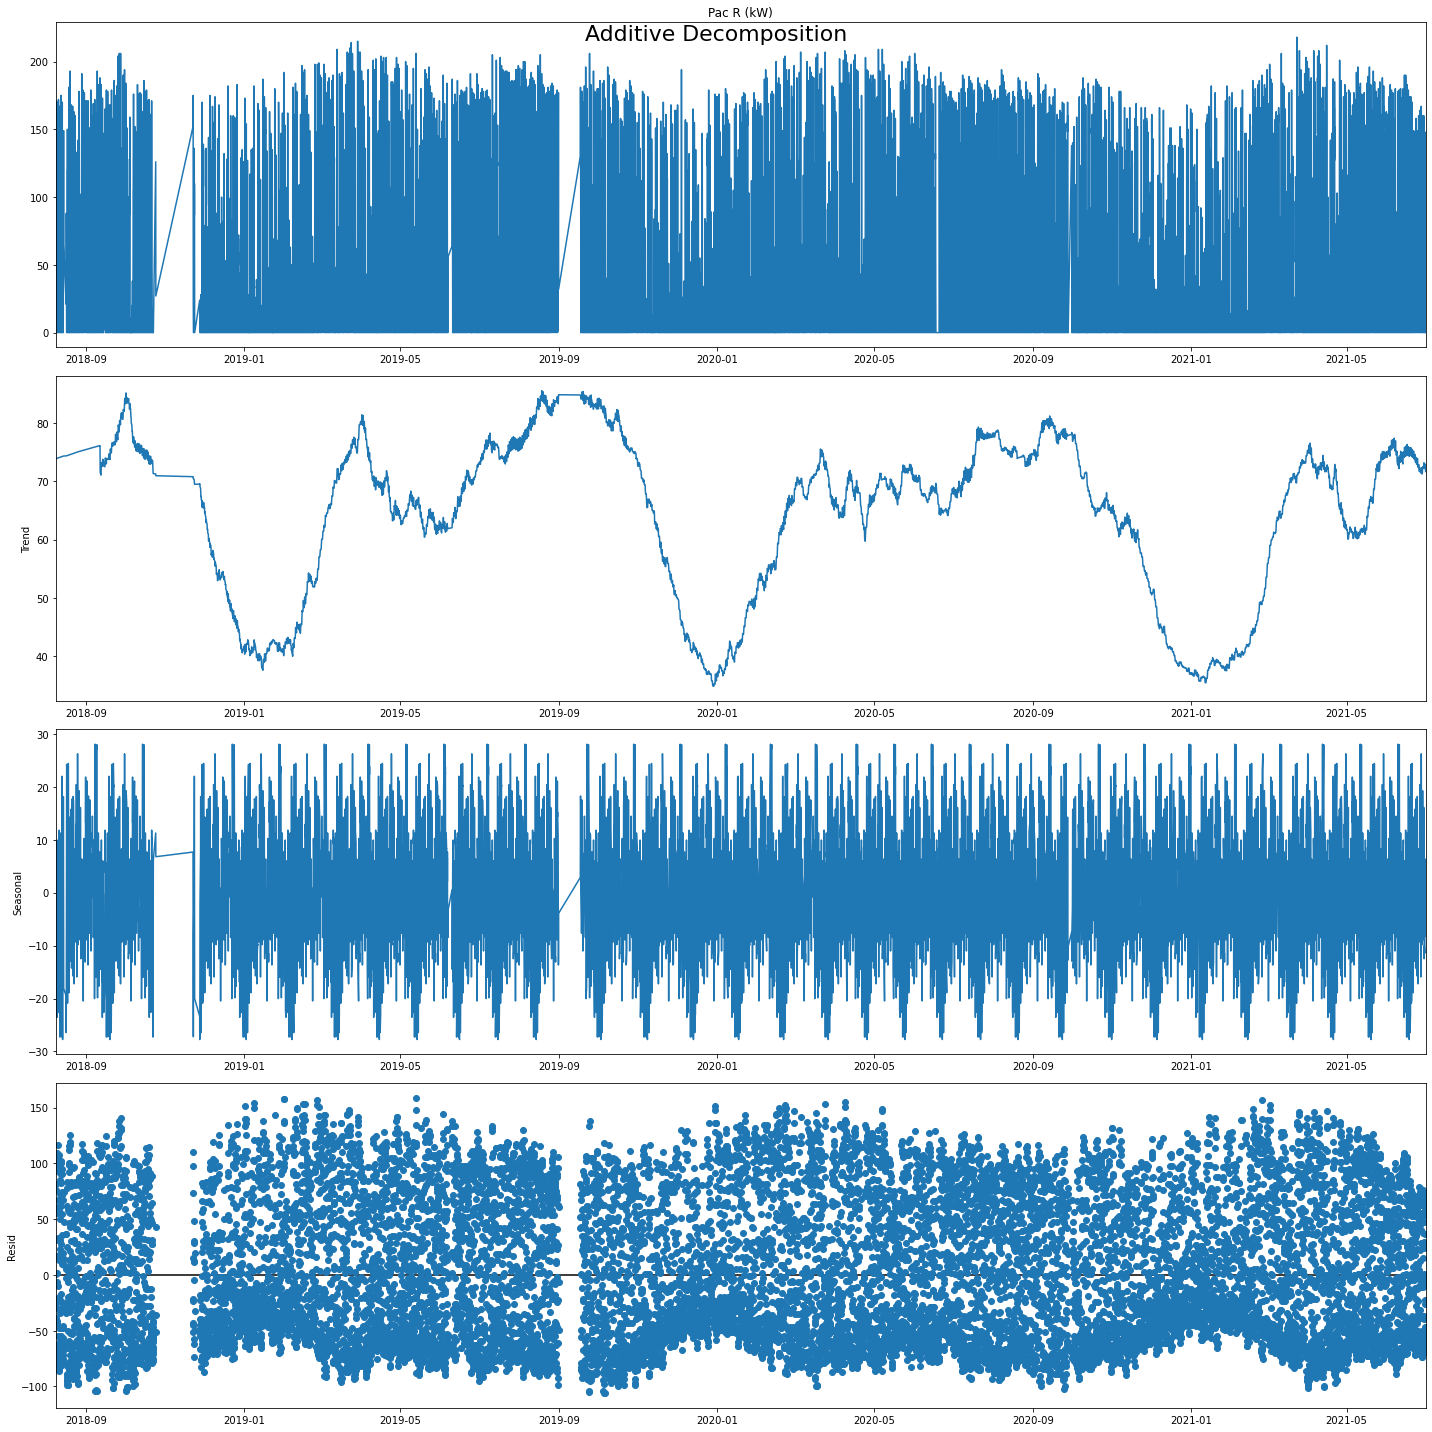

In [210]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition
result_add = seasonal_decompose(df['Pac R (kW)'], model='additive', extrapolate_trend='freq', period=30*17, two_sided = False)

# Plot
plt.rcParams.update({'figure.figsize': (20,20)})
result_add.plot().suptitle('Additive Decomposition', fontsize=22)
plt.show()

### test stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(17*7, min_periods=1).mean()
    rolstd = timeseries.rolling(17*7, min_periods=1).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [149]:
df['seasonal_difference_1m'] = result_add.seasonal
df['P detrended 1m'] = df['Pac R (kW)'] - df['seasonal_difference_1m']

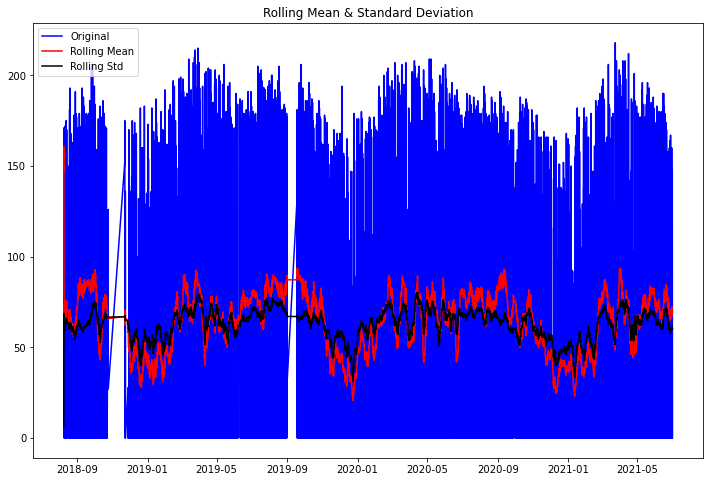

Results of Dickey-Fuller Test:
Test Statistic                -1.182282e+01
p-value                        8.336465e-22
#Lags Used                     4.300000e+01
Number of Observations Used    1.557600e+04
Critical Value (1%)           -3.430770e+00
Critical Value (5%)           -2.861726e+00
Critical Value (10%)          -2.566869e+00
dtype: float64


In [199]:
test_stationarity(df['Pac R (kW)'])
# IF: p-value < 0.05 (%5) THEN stationarity

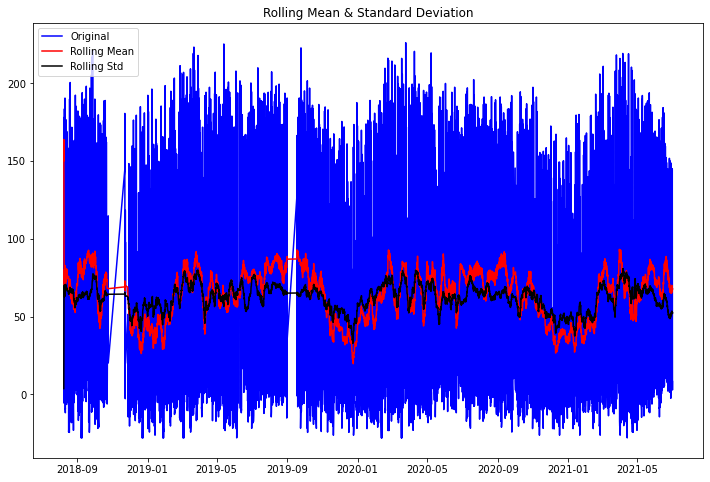

Results of Dickey-Fuller Test:
Test Statistic                -1.167912e+01
p-value                        1.758716e-21
#Lags Used                     4.300000e+01
Number of Observations Used    1.557600e+04
Critical Value (1%)           -3.430770e+00
Critical Value (5%)           -2.861726e+00
Critical Value (10%)          -2.566869e+00
dtype: float64


In [151]:
test_stationarity(df['P detrended 1m'])

### SARIMA

In [152]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [153]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df['Pac R (kW)'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.93843D+00    |proj g|=  1.09051D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.091D-06   5.938D+00
  F =   5.9384280978481181     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:185518.4937767752
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variabl

 This problem is unconstrained.



At iterate    5    f=  5.77334D+00    |proj g|=  5.97223D-03

At iterate   10    f=  5.77279D+00    |proj g|=  3.41210D-02

At iterate   15    f=  5.74308D+00    |proj g|=  1.02550D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     19     20      1     0     0   7.541D-08   5.741D+00
  F =   5.7408249392849866     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:179347.371103263
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.


SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:184276.70475862734


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.66594D+00    |proj g|=  2.32318D-01

At iterate    5    f=  5.64665D+00    |proj g|=  1.71229D-01

At iterate   10    f=  5.59807D+00    |proj g|=  2.46818D-01

At iterate   15    f=  5.59106D+00    |proj g|=  1.88202D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     16     26      1     0     0   4.986D-07   5.591D+00
  F =   5.5910561737639437     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0

 This problem is unconstrained.


SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:180149.1983583992


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.25042D+00    |proj g|=  1.69374D+01

At iterate    5    f=  5.76217D+00    |proj g|=  4.13843D-02

At iterate   10    f=  5.74275D+00    |proj g|=  8.67415D-01

At iterate   15    f=  5.61725D+00    |proj g|=  2.06330D-01

At iterate   20    f=  5.61723D+00    |proj g|=  1.88622D+00

At iterate   25    f=  5.61459D+00    |proj g|=  1.25587D-01

At iterate   30    f=  5.61204D+00    |proj g|=  1.63684D+00

At iterate   35    f=  5.59630D+00    |proj g|=  8.84885D-01

At iterate   40    f=  5.59568D+00    |proj g|=  8.79452D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:174815.19510656525


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.86155D+00    |proj g|=  5.33573D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   5.336D-06   5.862D+00
  F =   5.8615523146020543     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:183118.89430816818
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variab

 This problem is unconstrained.



At iterate    5    f=  5.64190D+00    |proj g|=  6.56830D-03

At iterate   10    f=  5.64106D+00    |proj g|=  8.37524D-02

At iterate   15    f=  5.60372D+00    |proj g|=  3.28868D-01

At iterate   20    f=  5.58981D+00    |proj g|=  1.70150D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     35      1     0     0   4.224D-07   5.589D+00
  F =   5.5891648624555712     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:174611.51030311204
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At 

 This problem is unconstrained.



At iterate    5    f=  5.56092D+00    |proj g|=  6.96910D-03

At iterate   10    f=  5.55344D+00    |proj g|=  2.65763D-01

At iterate   15    f=  5.41190D+00    |proj g|=  1.43876D-01

At iterate   20    f=  5.41065D+00    |proj g|=  3.66905D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     20     25      1     0     0   3.669D-05   5.411D+00
  F =   5.4106516743066422     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:169032.7583053395


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.77921D+00    |proj g|=  5.85435D-01

At iterate    5    f=  5.51065D+00    |proj g|=  1.11874D-02

At iterate   10    f=  5.50556D+00    |proj g|=  1.24947D-01

At iterate   15    f=  5.31441D+00    |proj g|=  6.58836D-01

At iterate   20    f=  5.28015D+00    |proj g|=  5.17595D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     27      1     0     0   2.046D-05   5.280D+00
  F =   5.2798297085461732     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  5.48957D+00    |proj g|=  3.27000D-01

At iterate   10    f=  5.43616D+00    |proj g|=  5.50205D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     16      1     0     0   2.211D-07   5.436D+00
  F =   5.4361592265805960     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:169829.6142383778
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.52895D+00    |proj g|=  6.06260D-01


 This problem is unconstrained.



At iterate    5    f=  5.40539D+00    |proj g|=  1.53402D-01

At iterate   10    f=  5.39996D+00    |proj g|=  2.13786D-02

At iterate   15    f=  5.28127D+00    |proj g|=  1.70978D+00

At iterate   20    f=  5.13183D+00    |proj g|=  1.22983D-01

At iterate   25    f=  5.13010D+00    |proj g|=  9.97576D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     34      1     0     0   8.805D-05   5.130D+00
  F =   5.1301010031865246     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:160270.35533954704
RUNNING THE L-BFGS-B CODE

           * * *

Machine pre

 This problem is unconstrained.



At iterate    5    f=  5.51223D+00    |proj g|=  1.60315D-02

At iterate   10    f=  5.50124D+00    |proj g|=  7.79154D-02

At iterate   15    f=  5.29712D+00    |proj g|=  8.39058D-02

At iterate   20    f=  5.28299D+00    |proj g|=  3.38359D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     24      1     0     0   1.305D-06   5.283D+00
  F =   5.2829911256450961     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:165046.6427651528
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X

 This problem is unconstrained.



At iterate    5    f=  5.51409D+00    |proj g|=  7.25280D-02

At iterate   10    f=  5.50924D+00    |proj g|=  3.45132D-02

At iterate   15    f=  5.48275D+00    |proj g|=  3.63026D-01

At iterate   20    f=  5.45571D+00    |proj g|=  4.75465D-01

At iterate   25    f=  5.23027D+00    |proj g|=  3.10455D-01

At iterate   30    f=  5.13445D+00    |proj g|=  1.48019D-01

At iterate   35    f=  5.13443D+00    |proj g|=  2.83340D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     66      1     0     0   2.833D-04   5.134D+00
  F =   5.1344317172779572     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.59188D+00    |proj g|=  5.35042D-01

At iterate    5    f=  5.49574D+00    |proj g|=  8.81764D-03

At iterate   10    f=  5.44878D+00    |proj g|=  2.25061D-01

At iterate   15    f=  5.38706D+00    |proj g|=  1.02635D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     20      1     0     0   6.691D-07   5.387D+00
  F =   5.3870551254545562     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0

 This problem is unconstrained.



At iterate    5    f=  5.40305D+00    |proj g|=  5.91006D-02

At iterate   10    f=  5.39967D+00    |proj g|=  9.25906D-03

At iterate   15    f=  5.37423D+00    |proj g|=  2.71467D-01

At iterate   20    f=  5.13643D+00    |proj g|=  1.22321D-01

At iterate   25    f=  5.12815D+00    |proj g|=  7.85558D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     39      1     0     0   3.763D-06   5.128D+00
  F =   5.1281459847906641     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:160211.28056486035
RUNNING THE L-BFGS-B CODE

           * * *

Machine pre

 This problem is unconstrained.


SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:152159.77168224863
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.86499D+00    |proj g|=  1.15542D-02

At iterate    5    f=  4.86486D+00    |proj g|=  7.40055D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     12      1     0     0   5.483D-06   4.865D+00
  F =   4.8648562957391039     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:151982.1106788896
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0 

 This problem is unconstrained.


SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:162173.81685099856
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.01723D+00    |proj g|=  2.52868D-01


 This problem is unconstrained.



At iterate    5    f=  4.91853D+00    |proj g|=  9.68155D-03

At iterate   10    f=  4.87687D+00    |proj g|=  3.83150D-01

At iterate   15    f=  4.86622D+00    |proj g|=  2.06903D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     19     51      1     0     0   1.026D-05   4.865D+00
  F =   4.8653418054557864     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:151997.27800243878
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.86609D+00    |proj g|=  5.00826D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explo

 This problem is unconstrained.


SARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:152020.7939901595
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.86404D+00    |proj g|=  3.01622D-02


 This problem is unconstrained.



At iterate    5    f=  4.85397D+00    |proj g|=  5.70523D-04

At iterate   10    f=  4.85389D+00    |proj g|=  1.06508D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     23      1     0     0   1.603D-06   4.854D+00
  F =   4.8538927430928238     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:151641.60929421982


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.12388D+00    |proj g|=  5.67173D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   5.672D-06   5.124D+00
  F =   5.1238767216026515     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:160073.90878286684
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variab

 This problem is unconstrained.


  ys=-8.890E-03  -gs= 1.192E-01 BFGS update SKIPPED

At iterate    5    f=  4.91391D+00    |proj g|=  2.79975D-01

At iterate   10    f=  4.91345D+00    |proj g|=  8.33805D-02

At iterate   15    f=  4.90712D+00    |proj g|=  2.64589D-01

At iterate   20    f=  4.86617D+00    |proj g|=  5.29955D-02

At iterate   25    f=  4.86451D+00    |proj g|=  4.70871D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     47      2     1     0   4.709D-04   4.865D+00
  F =   4.8645051692685630     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:151973.1414879499
RUNNI

 This problem is unconstrained.



At iterate    5    f=  4.79425D+00    |proj g|=  2.87095D-03

At iterate   10    f=  4.79420D+00    |proj g|=  1.53815D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     14      1     0     0   1.873D-06   4.794D+00
  F =   4.7941979795215390     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:149774.74488025287


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.79499D+00    |proj g|=  1.04897D-01

At iterate    5    f=  4.78994D+00    |proj g|=  5.49984D-04

At iterate   10    f=  4.78990D+00    |proj g|=  4.80783D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     16      1     0     0   8.138D-06   4.790D+00
  F =   4.7898731186117143     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:149641.63622542995
RUNNING THE L

 This problem is unconstrained.



At iterate    5    f=  5.12411D+00    |proj g|=  4.54101D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     13      1     0     0   2.339D-07   5.124D+00
  F =   5.1241049598602331     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:160081.0389460337
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.95900D+00    |proj g|=  2.08651D-01


 This problem is unconstrained.



At iterate    5    f=  4.88269D+00    |proj g|=  8.24746D-02

At iterate   10    f=  4.88164D+00    |proj g|=  6.42093D-02

At iterate   15    f=  4.80892D+00    |proj g|=  1.85051D-01

At iterate   20    f=  4.78884D+00    |proj g|=  5.38329D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     34      1     0     0   9.733D-06   4.789D+00
  F =   4.7888360267381271     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:149609.2374752991
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.79372D+00    |proj g|=  9.82875D-02

At iterate    5    f=  4.79065D+00    |proj g|=  5.43509D-04

At iterate   10    f=  4.79060D+00    |proj g|=  4.89718D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     15      1     0     0   4.193D-06   4.791D+00
  F =   4.7905844805003186     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:149663.85917082996
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  4.78910D+00    |proj g|=  1.91821D-02

At iterate   10    f=  4.78620D+00    |proj g|=  1.63714D-02

At iterate   15    f=  4.78606D+00    |proj g|=  1.41492D-03

At iterate   20    f=  4.78598D+00    |proj g|=  2.95605D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     27      1     0     0   2.393D-06   4.786D+00
  F =   4.7859702116326588     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:149521.70941140427


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.04186D+00    |proj g|=  6.18361D-02

At iterate    5    f=  5.03825D+00    |proj g|=  4.09501D-02

At iterate   10    f=  5.03117D+00    |proj g|=  4.32803D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     14      1     0     0   4.728D-06   5.031D+00
  F =   5.0311656586545501     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:157179.61517636816


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.98353D+00    |proj g|=  1.66860D-01

At iterate    5    f=  4.88832D+00    |proj g|=  1.97025D-01

At iterate   10    f=  4.88171D+00    |proj g|=  1.19697D-02

At iterate   15    f=  4.87873D+00    |proj g|=  1.14730D-01

At iterate   20    f=  4.81969D+00    |proj g|=  2.28294D-01

At iterate   25    f=  4.78859D+00    |proj g|=  3.67671D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     51      1     0     0   

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     12      1     0     0   4.358D-05   4.856D+00
  F =   4.8558507070442154     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:151700.77608806128


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.87787D+00    |proj g|=  1.86204D-01

At iterate    5    f=  4.84865D+00    |proj g|=  6.08685D-03

At iterate   10    f=  4.84865D+00    |proj g|=  1.83084D-03

At iterate   15    f=  4.84863D+00    |proj g|=  1.58736D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     22      1     0     0   9.286D-07   4.849D+00
  F =   4.8486340862221198     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     10      1     0     0   2.176D-05   5.160D+00
  F =   5.1601581013173590     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:161207.3390851543
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.94089D+00    |proj g|=  1.96679D-01


 This problem is unconstrained.



At iterate    5    f=  4.92067D+00    |proj g|=  3.65684D-02

At iterate   10    f=  4.92010D+00    |proj g|=  1.01136D-01

At iterate   15    f=  4.88518D+00    |proj g|=  2.99126D-01

At iterate   20    f=  4.83794D+00    |proj g|=  2.77446D-01

At iterate   25    f=  4.83582D+00    |proj g|=  1.38491D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     40      1     0     0   1.385D-05   4.836D+00
  F =   4.8358236652520938     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:151077.1313024754
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.96352D+00    |proj g|=  4.75637D-01

At iterate    5    f=  4.85030D+00    |proj g|=  1.28531D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.285D-04   4.850D+00
  F =   4.8503027280079261     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:151529.4572229676


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.88267D+00    |proj g|=  8.84339D-01

At iterate    5    f=  4.84778D+00    |proj g|=  3.17830D-03

At iterate   10    f=  4.84778D+00    |proj g|=  9.13945D-04

At iterate   15    f=  4.84777D+00    |proj g|=  9.11044D-03

At iterate   20    f=  4.84775D+00    |proj g|=  1.38356D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     28      1     0     0   4.925D-05   4.848D+00
  F =   4.8477540740181979     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.10232D+00    |proj g|=  8.63814D-02

At iterate    5    f=  5.09836D+00    |proj g|=  8.54339D-03

At iterate   10    f=  5.09516D+00    |proj g|=  2.83191D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     46      2     0     0   1.779D-05   5.095D+00
  F =   5.0948224716082793     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:159168.25401304264
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.98427D+00    |proj g|=  1.76731D-01


 This problem is unconstrained.



At iterate    5    f=  4.92076D+00    |proj g|=  1.53893D-01

At iterate   10    f=  4.91980D+00    |proj g|=  3.31666D-02

At iterate   15    f=  4.89957D+00    |proj g|=  2.38951D-01

At iterate   20    f=  4.85339D+00    |proj g|=  3.08084D-01

At iterate   25    f=  4.83492D+00    |proj g|=  7.98646D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     46      1     0     0   2.856D-06   4.835D+00
  F =   4.8349051713034701     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:151050.43755152042
RUNNING THE L-BFGS-B CODE

           * * *

Machine pre

 This problem is unconstrained.



At iterate    5    f=  4.77219D+00    |proj g|=  6.13220D-03

At iterate   10    f=  4.77163D+00    |proj g|=  2.98473D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     17      1     0     0   1.009D-05   4.772D+00
  F =   4.7716297017655842     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:149071.71188315685
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.79694D+00    |proj g|=  2.18643D-01


 This problem is unconstrained.



At iterate    5    f=  4.76705D+00    |proj g|=  2.31647D-02

At iterate   10    f=  4.76638D+00    |proj g|=  2.23067D-02

At iterate   15    f=  4.76619D+00    |proj g|=  1.66634D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     18      1     0     0   1.666D-05   4.766D+00
  F =   4.7661932652907311     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:148903.87760768243


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.07925D+00    |proj g|=  1.20682D-02

At iterate    5    f=  5.07915D+00    |proj g|=  7.20214D-03

At iterate   10    f=  5.07799D+00    |proj g|=  3.94494D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     17      1     0     0   8.395D-06   5.078D+00
  F =   5.0776125864461967     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:158630.61720057917
RUNNING THE L

 This problem is unconstrained.



At iterate    5    f=  4.85397D+00    |proj g|=  7.85937D-02

At iterate   10    f=  4.85363D+00    |proj g|=  2.41433D-02

At iterate   15    f=  4.81975D+00    |proj g|=  2.76438D-01

At iterate   20    f=  4.74448D+00    |proj g|=  4.19747D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     36      1     0     0   2.190D-05   4.744D+00
  F =   4.7442766043907891     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:148219.20112116824
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At 

 This problem is unconstrained.



At iterate    5    f=  4.76762D+00    |proj g|=  3.98868D-03

At iterate   10    f=  4.76756D+00    |proj g|=  9.00493D-03

At iterate   15    f=  4.76697D+00    |proj g|=  5.30975D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     21      1     0     0   1.947D-06   4.767D+00
  F =   4.7669522031356575     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:148927.58682595793


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.83231D+00    |proj g|=  9.82090D-01

At iterate    5    f=  4.76835D+00    |proj g|=  1.27087D-02

At iterate   10    f=  4.76826D+00    |proj g|=  3.07208D-03

At iterate   15    f=  4.76789D+00    |proj g|=  4.56370D-03

At iterate   20    f=  4.76781D+00    |proj g|=  2.95633D-03

At iterate   25    f=  4.76759D+00    |proj g|=  2.67392D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     32      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  5.00221D+00    |proj g|=  1.10110D-02

At iterate   10    f=  4.98868D+00    |proj g|=  4.98606D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     18      1     0     0   3.589D-05   4.988D+00
  F =   4.9877993252606361     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:155826.85092114226
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.90387D+00    |proj g|=  1.44120D-01


 This problem is unconstrained.



At iterate    5    f=  4.85617D+00    |proj g|=  4.17165D-02

At iterate   10    f=  4.85301D+00    |proj g|=  5.14601D-02

At iterate   15    f=  4.85213D+00    |proj g|=  1.16395D-01

At iterate   20    f=  4.83891D+00    |proj g|=  2.14370D-01

At iterate   25    f=  4.78049D+00    |proj g|=  3.86385D-01

At iterate   30    f=  4.74404D+00    |proj g|=  2.55803D-02

At iterate   35    f=  4.74399D+00    |proj g|=  1.17302D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     59      1     0     0   1.173D-06   4.744D+00
  F =   4.7439851100484400     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.


SARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:148994.42460224807


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.76852D+00    |proj g|=  7.42070D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      7      1     0     0   2.941D-05   4.765D+00
  F =   4.7651427604058032     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:148869.0598350773
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variabl

 This problem is unconstrained.


SARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:159470.28467655924
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.93113D+00    |proj g|=  2.07883D-01


 This problem is unconstrained.



At iterate    5    f=  4.85638D+00    |proj g|=  8.98372D-02

At iterate   10    f=  4.85301D+00    |proj g|=  2.39644D-01

At iterate   15    f=  4.76703D+00    |proj g|=  3.15977D-01

At iterate   20    f=  4.76369D+00    |proj g|=  1.01901D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     39      1     0     0   5.079D-06   4.764D+00
  F =   4.7636920799710252     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:148823.74057829482
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At 

 This problem is unconstrained.



At iterate    5    f=  4.76517D+00    |proj g|=  1.79997D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     11      1     0     0   2.039D-05   4.765D+00
  F =   4.7651699017386004     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:148869.9077303139


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.76815D+00    |proj g|=  8.20142D-02

At iterate    5    f=  4.76491D+00    |proj g|=  4.47245D-03

At iterate   10    f=  4.76380D+00    |proj g|=  8.38865D-03

At iterate   15    f=  4.76375D+00    |proj g|=  1.01402D-04

At iterate   20    f=  4.76375D+00    |proj g|=  2.59885D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     24      1     0     0   1.188D-06   4.764D+00
  F =   4.7637465693890961     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.01064D+00    |proj g|=  8.66819D-02

At iterate    5    f=  4.99979D+00    |proj g|=  4.57041D-02

At iterate   10    f=  4.99131D+00    |proj g|=  3.78697D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     14      1     0     0   8.921D-06   4.991D+00
  F =   4.9913070156672088     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:155934.4311694436


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.95319D+00    |proj g|=  1.68762D-01

At iterate    5    f=  4.85621D+00    |proj g|=  9.12212D-02

At iterate   10    f=  4.85595D+00    |proj g|=  8.49669D-02

At iterate   15    f=  4.83032D+00    |proj g|=  1.43338D-01

At iterate   20    f=  4.76375D+00    |proj g|=  1.69748D-02

At iterate   25    f=  4.76361D+00    |proj g|=  5.51557D-05



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     59      1     0     0   5.516D-05   4.764D+00
  F =   4.7636083912381242     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:148823.126142279
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.76650D+00    |proj g|=  9.86373D-03


 This problem is unconstrained.



At iterate    5    f=  4.76636D+00    |proj g|=  1.37331D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      8      1     0     0   1.373D-05   4.766D+00
  F =   4.7663590448751680     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:148907.05656190024


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.76575D+00    |proj g|=  7.45727D-02

At iterate    5    f=  4.76226D+00    |proj g|=  2.97928D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     11      1     0     0   1.685D-05   4.762D+00
  F =   4.7622558935427586     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:148780.87411427576
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16


 This problem is unconstrained.



At iterate    5    f=  5.10145D+00    |proj g|=  9.24292D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      8      1     0     0   9.243D-06   5.101D+00
  F =   5.1014525047755486     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:159375.37624918815
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.92780D+00    |proj g|=  2.07053D-01


 This problem is unconstrained.



At iterate    5    f=  4.85301D+00    |proj g|=  1.22839D-02

At iterate   10    f=  4.82469D+00    |proj g|=  1.11493D-01

At iterate   15    f=  4.76098D+00    |proj g|=  7.22894D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     31      1     0     0   5.903D-06   4.761D+00
  F =   4.7608192509569376     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:148735.99339989474
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate  

 This problem is unconstrained.



At iterate    5    f=  4.76256D+00    |proj g|=  3.16949D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6      8      1     0     0   1.650D-05   4.763D+00
  F =   4.7625615822409664     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:148790.42382920778
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.76541D+00    |proj g|=  8.19303D-02


 This problem is unconstrained.



At iterate    5    f=  4.76203D+00    |proj g|=  2.06585D-03

At iterate   10    f=  4.76152D+00    |proj g|=  2.82634D-02

At iterate   15    f=  4.76101D+00    |proj g|=  8.88991D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     18      1     0     0   8.879D-05   4.761D+00
  F =   4.7610080515769901     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:148743.89153126517


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.00689D+00    |proj g|=  8.96762D-02

At iterate    5    f=  4.99856D+00    |proj g|=  1.00081D-02

At iterate   10    f=  4.99072D+00    |proj g|=  7.37379D-02

At iterate   15    f=  4.98742D+00    |proj g|=  8.51685D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     20      1     0     0   1.843D-06   4.987D+00
  F =   4.9874148876876898     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1

 This problem is unconstrained.



At iterate    5    f=  4.85935D+00    |proj g|=  6.81500D-02

At iterate   10    f=  4.85272D+00    |proj g|=  1.22793D-02

At iterate   15    f=  4.82610D+00    |proj g|=  1.70576D-01

At iterate   20    f=  4.81877D+00    |proj g|=  9.70634D-02

At iterate   25    f=  4.76721D+00    |proj g|=  3.26994D-01

At iterate   30    f=  4.76073D+00    |proj g|=  6.47196D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     49      1     0     0   5.323D-06   4.761D+00
  F =   4.7607264965242679     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:148735.095751

#### fitting the best chosen model

In [155]:
# Import the statsmodels library for using SARIMAX model
import statsmodels.api as sm

# Fit the SARIMAX model using optimal parameters
mod = sm.tsa.statespace.SARIMAX(df['Pac R (kW)'],
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

#AIC:148212.09483791326

#### model diagnostics

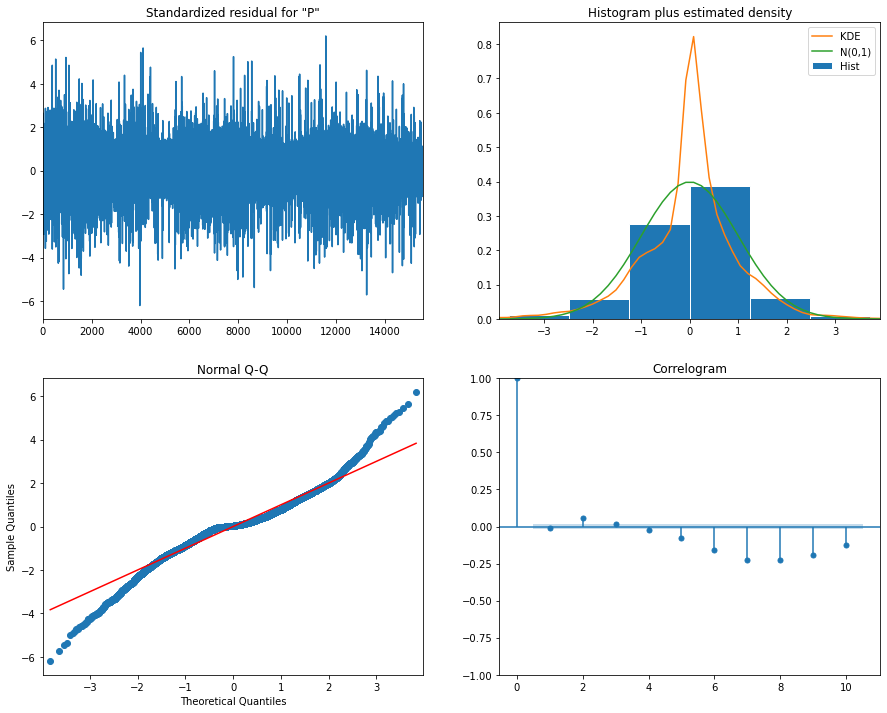

In [156]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

### fb prophet

In [113]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [114]:
df_prophet = df['Pac R (kW)'].reset_index()

In [119]:
#df_prophet.rename_columns(['ds', 'y'])
df_prophet = df_prophet.rename(columns= {'Date/Time':'ds', 'Pac R (kW)':'y'})

Initial log joint probability = -993.835
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       20906.9    0.00206664       547.804      0.8204      0.8204      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     136         20918   0.000680898       693.264   6.668e-07       0.001      210  LS failed, Hessian reset 
     195       20934.7   0.000801611       799.963   1.102e-06       0.001      325  LS failed, Hessian reset 
     199         20936    0.00215575       396.745           1           1      329   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       20939.3   3.52202e-05       378.643           1           1      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     336       20939.3    3.5078e-07        334.46      0.5173      0.5173      498   
Optimization terminat

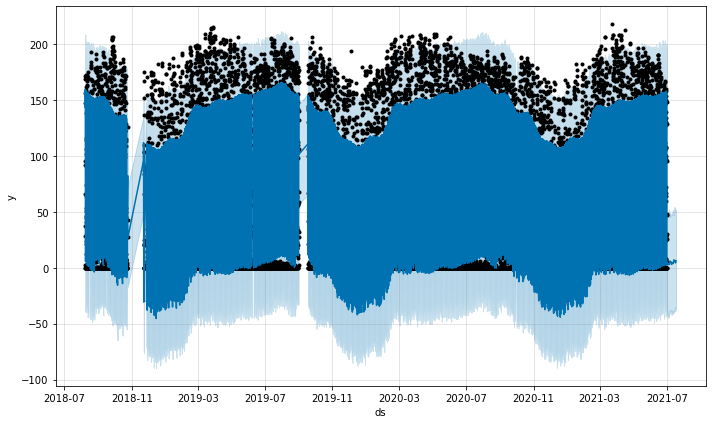

In [187]:
# Python
m = Prophet(changepoint_prior_scale=0.01).fit(df_prophet)
future = m.make_future_dataframe(periods=17, freq='H')
fcst = m.predict(future)
fig = m.plot(fcst)

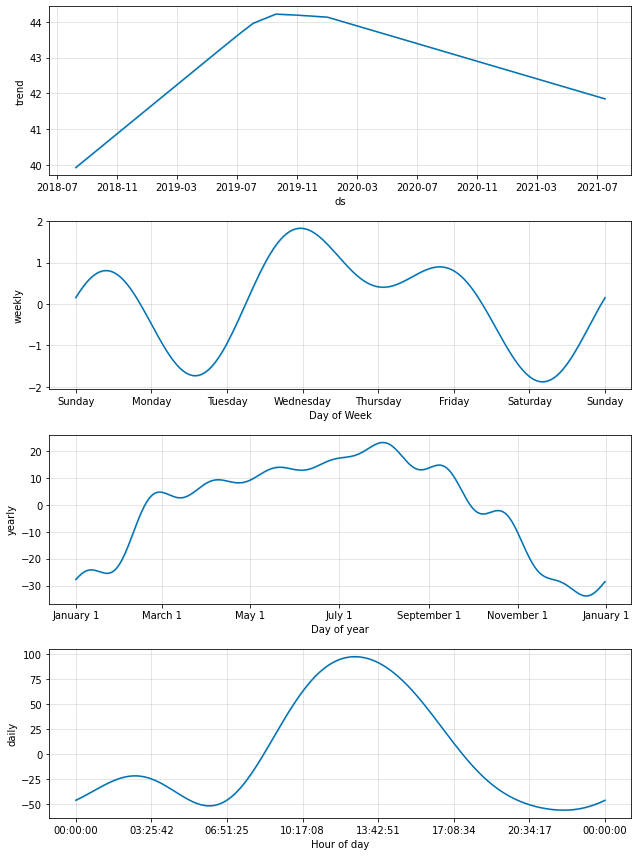

In [188]:
fig = m.plot_components(fcst)

Initial log joint probability = -976.924
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       20442.9    0.00803311       278.194           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       20453.3    0.00198936       196.552           1           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       20457.6   0.000254219       79.6574           1           1      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     384       20457.8   3.78587e-06       58.1347      0.3105           1      471   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


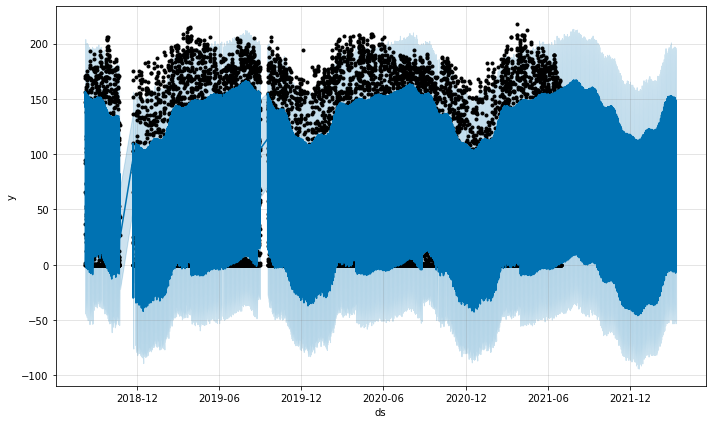

In [196]:
df2 = df_prophet.copy()
df2['ds'] = pd.to_datetime(df2['ds'])
df2 = df2[(df2['ds'].dt.hour >= 6) & (df2['ds'].dt.hour <= 22)]
m = Prophet().fit(df2)
future = m.make_future_dataframe(periods=17*30*12, freq='H')
# eliminates gaps in the data
future2 = future.copy()
future2 = future2[(future2['ds'].dt.hour >= 6) & (future2['ds'].dt.hour <= 22)]
fcst = m.predict(future2)
fig = m.plot(fcst)

In [198]:
#yhat = trend + seasonality + holidays + regressors + noise
fcst.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

### statistical test for stationarity

In [150]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(17*7, min_periods=1).mean()
    rolstd = timeseries.rolling(17*7, min_periods=1).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

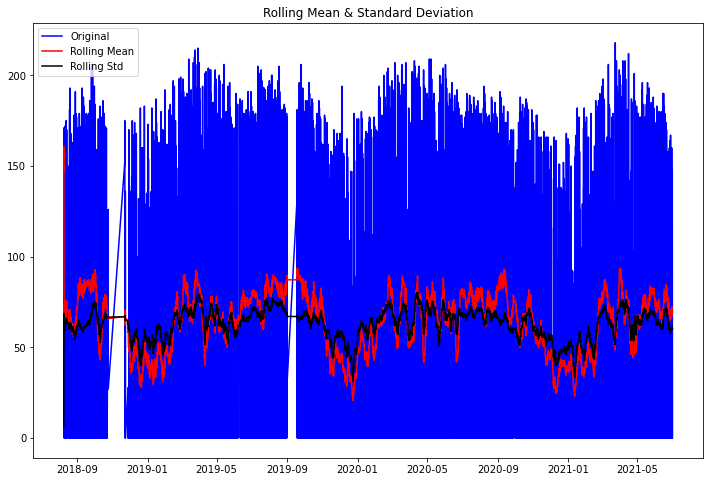

Results of Dickey-Fuller Test:
Test Statistic                -1.182282e+01
p-value                        8.336465e-22
#Lags Used                     4.300000e+01
Number of Observations Used    1.557600e+04
Critical Value (1%)           -3.430770e+00
Critical Value (5%)           -2.861726e+00
Critical Value (10%)          -2.566869e+00
dtype: float64


In [129]:
# data are said to be stationary since the test statistic is lower than the critical value (look also at the p-value)
test_stationarity(df['Pac R (kW)'])

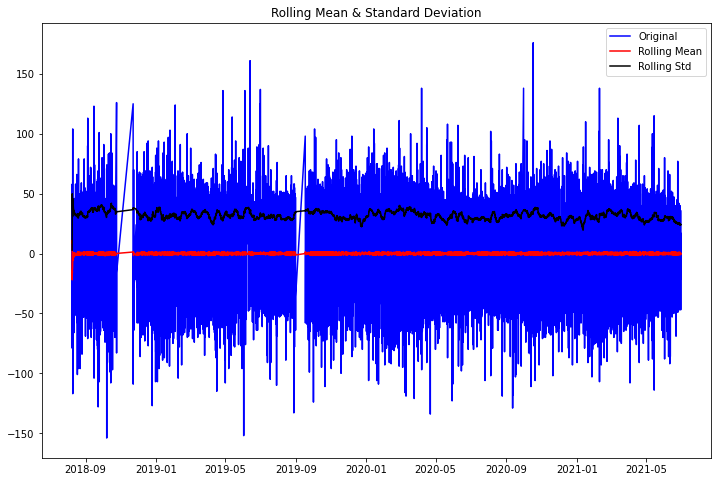

Results of Dickey-Fuller Test:
Test Statistic                   -27.147859
p-value                            0.000000
#Lags Used                        43.000000
Number of Observations Used    15575.000000
Critical Value (1%)               -3.430770
Critical Value (5%)               -2.861726
Critical Value (10%)              -2.566869
dtype: float64


In [130]:
df['first_difference'] = df['Pac R (kW)'] - df['Pac R (kW)'].shift(1)
test_stationarity(df['first_difference'].dropna(inplace= False))

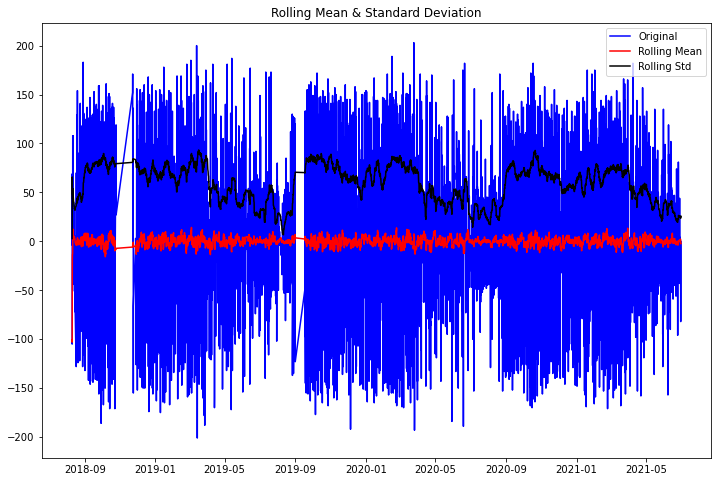

Results of Dickey-Fuller Test:
Test Statistic                   -23.886368
p-value                            0.000000
#Lags Used                        43.000000
Number of Observations Used    15559.000000
Critical Value (1%)               -3.430770
Critical Value (5%)               -2.861726
Critical Value (10%)              -2.566869
dtype: float64


In [131]:
df['seasonal_difference_24'] = df['Pac R (kW)'] - df['Pac R (kW)'].shift(17)
test_stationarity(df['seasonal_difference_24'].dropna(inplace= False))

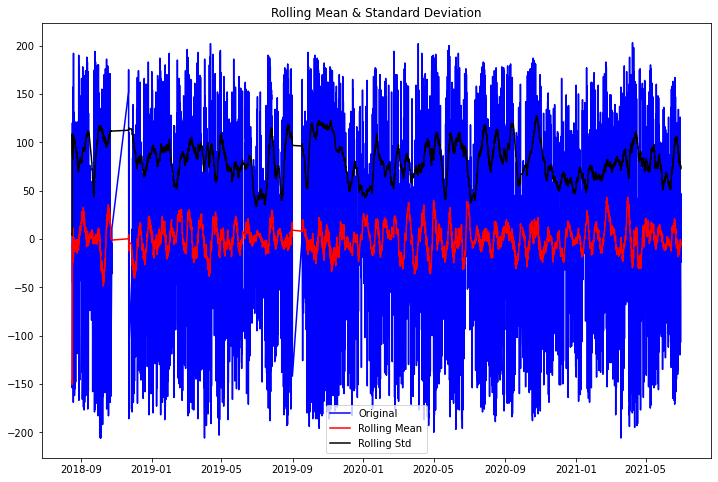

Results of Dickey-Fuller Test:
Test Statistic                -1.527746e+01
p-value                        4.626834e-28
#Lags Used                     4.300000e+01
Number of Observations Used    1.545700e+04
Critical Value (1%)           -3.430773e+00
Critical Value (5%)           -2.861727e+00
Critical Value (10%)          -2.566870e+00
dtype: float64


In [132]:
df['seasonal_difference_1w'] = df['Pac R (kW)'] - df['Pac R (kW)'].shift(17*7)
test_stationarity(df['seasonal_difference_1w'].dropna(inplace= False))

#### check for trends in the data

In [200]:
# the simple moving average over a period of 12 hours
df['Pac_12'] = df['Pac R (kW)'].rolling(12, min_periods=1).mean()

# the simple moving average over a period of 24 hours
df['Pac_24'] = df['Pac R (kW)'].rolling(17, min_periods=1).mean()

# the simple moving average over a period of 48 hours
df['Pac_1w'] = df['Pac R (kW)'].rolling(17*7, min_periods=1).mean()

# the simple moving average over a period of 1 week
df['Pac_4w'] = df['Pac R (kW)'].rolling(17*7*4, min_periods=1).mean()

Text(0, 0.5, 'Pca')

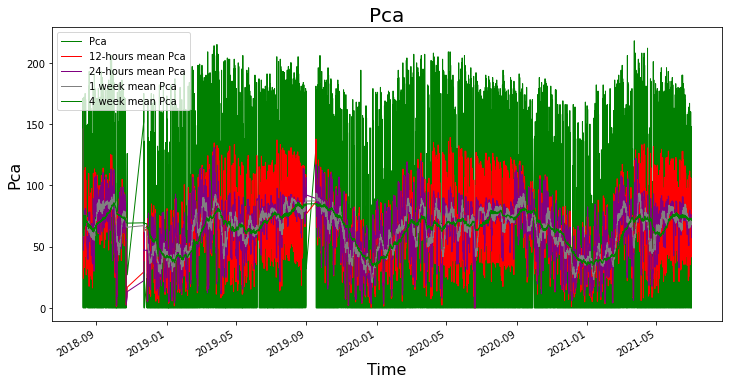

In [201]:
# colors for the line plot
colors = ['green', 'red', 'purple', 'grey']

# line plot - the pca
df[['Pac R (kW)', 'Pac_12', 'Pac_24', 'Pac_1w', 'Pac_4w']].plot(color=colors, linewidth=1, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(labels =['Pca', '12-hours mean Pca', '24-hours mean Pca', '1 week mean Pca', '4 week mean Pca'], fontsize=10)

# title and labels
plt.title('Pca', fontsize=20)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Pca', fontsize=16)

In [202]:
df['Pac_detrend_12'] = df['Pac R (kW)'] - df['Pac_12']
df['Pac_detrend_24'] = df['Pac R (kW)'] - df['Pac_24']
df['Pac_detrend_1w'] = df['Pac R (kW)'] - df['Pac_1w']
df['Pac_detrend_4w'] = df['Pac R (kW)'] - df['Pac_4w']

In [203]:
# the simple moving average over a period of 24 hours
df['Pac_12_detrend_mean'] = df['Pac_detrend_12'].rolling(12, min_periods=1).mean()

# the simple moving average over a period of 24 hours
df['Pac_24_detrend_mean'] = df['Pac_detrend_24'].rolling(17, min_periods=1).mean()

# the simple moving average over a period of 48 hours
df['Pac_1w_detrend_mean'] = df['Pac_detrend_1w'].rolling(17*7, min_periods=1).mean()

# the simple moving average over a period of 48 hours
df['Pac_4w_detrend_mean'] = df['Pac_detrend_4w'].rolling(17*7*4, min_periods=1).mean()

Text(0, 0.5, 'P')

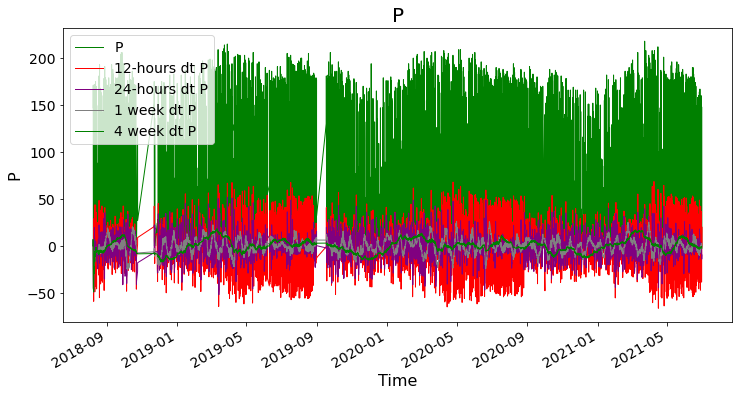

In [204]:
# colors for the line plot
colors = ['green', 'red', 'purple', 'grey']

# line plot - the pca
df[['Pac R (kW)', 'Pac_12_detrend_mean', 'Pac_24_detrend_mean', 'Pac_1w_detrend_mean', 'Pac_4w_detrend_mean']].plot(color=colors, linewidth=1, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['P', '12-hours dt P', '24-hours dt P', '1 week dt P', '4 week dt P'], fontsize=14)

# title and labels
plt.title('P', fontsize=20)
plt.xlabel('Time', fontsize=16)
plt.ylabel('P', fontsize=16)

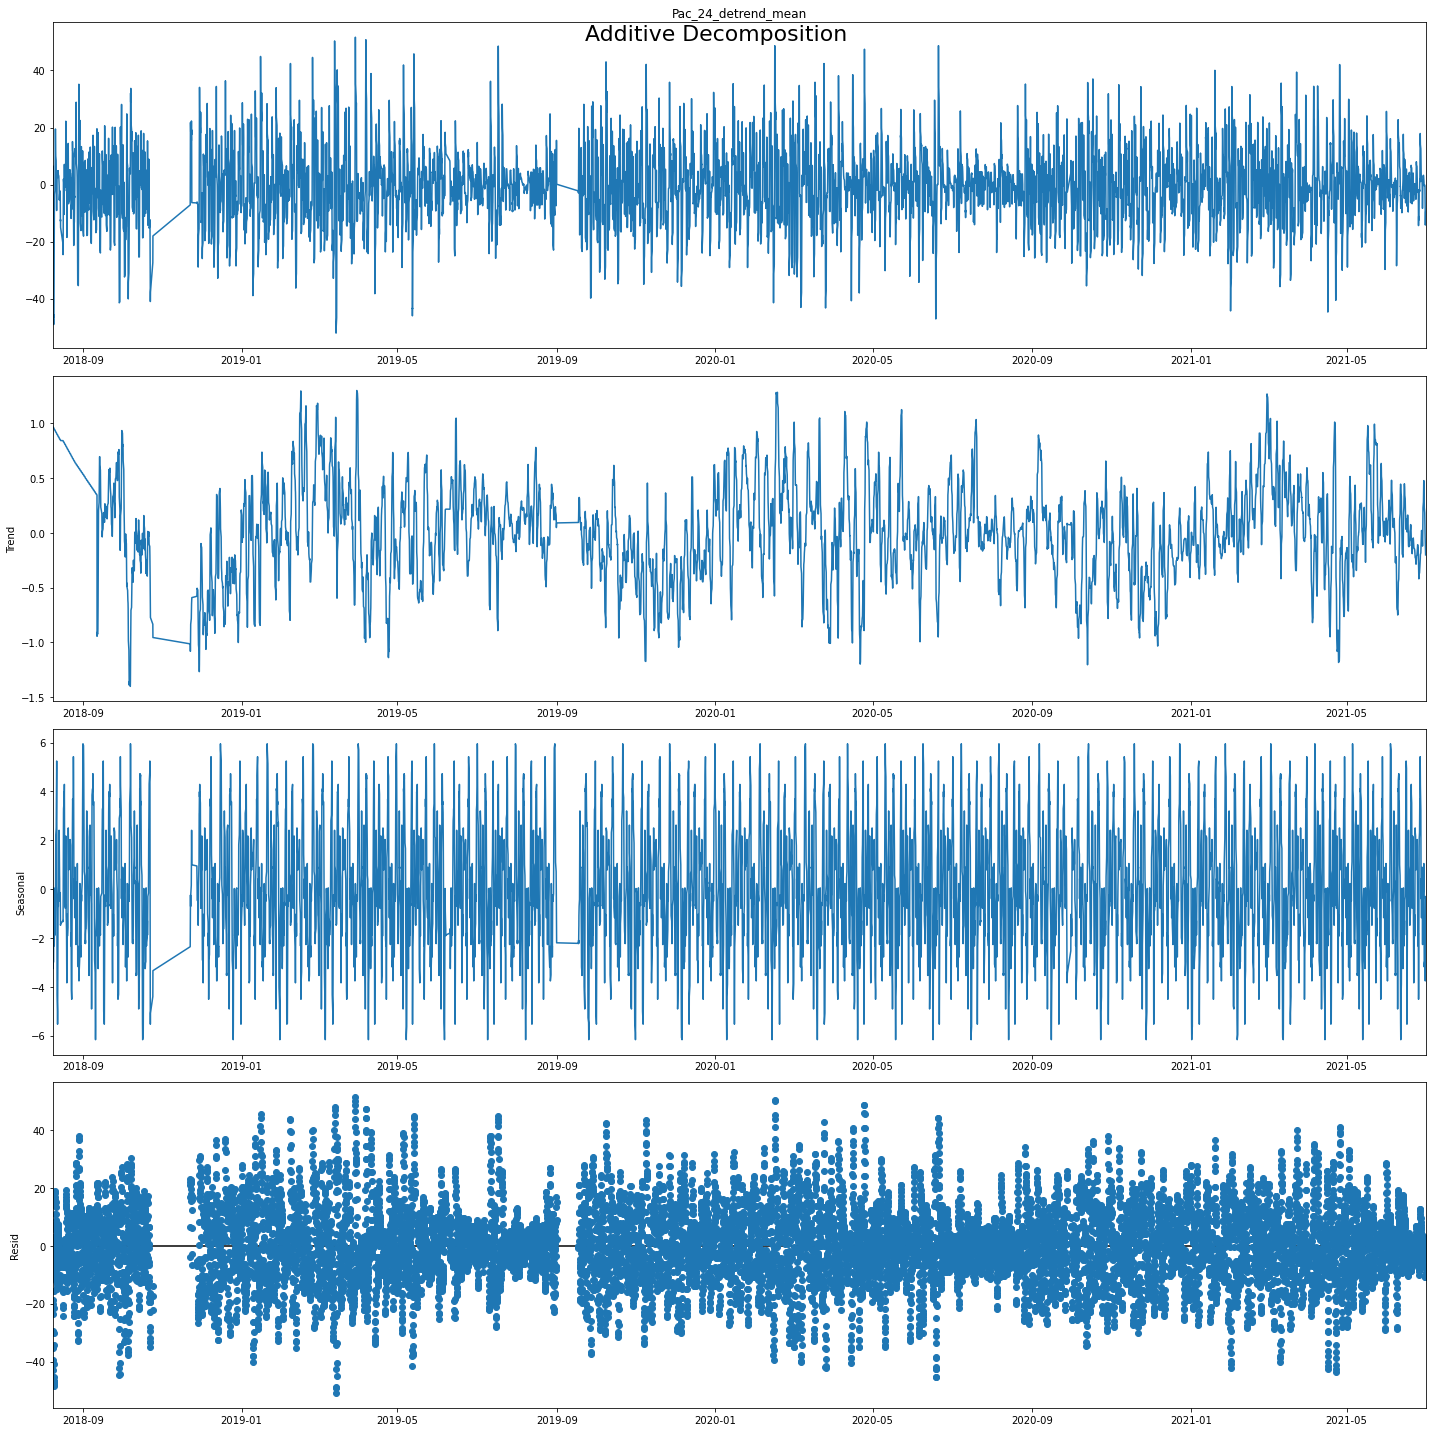

In [209]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition
result_add = seasonal_decompose(df['Pac_24_detrend_mean'], model='additive', extrapolate_trend='freq', period=30*17, two_sided = False)

# Plot
plt.rcParams.update({'figure.figsize': (20,20)})
result_add.plot().suptitle('Additive Decomposition', fontsize=22)
plt.show()

### Regression

In [20]:
night_indexes = df['Pac R (kW)'][((df['Pac R (kW)'].index.hour >= 20) & (df['Pac R (kW)'].index.hour <= 23)) | ((df['Pac R (kW)'].index.hour >= 0) & (df['Pac R (kW)'].index.hour <= 7))].index

In [21]:
day_indexes = set(df.index) - set(night_indexes)

In [22]:
df_day = df.loc[day_indexes,:].sort_index()

In [23]:
import statsmodels.api as sm # import statsmodels 

def make_regression(X,y, constant = False):
    if constant:
        X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)
    return model

def plot_residuals(model, string):
    fig = sm.graphics.plot_regress_exog(model, string)
    fig.tight_layout(pad=1.0)
    return

In [24]:
X = df_day[['Irradiance (W/mq)', ]]
y = df_day['Pac R (kW)']
model = make_regression(X,y)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Pac R (kW)   R-squared (uncentered):                   0.782
Model:                            OLS   Adj. R-squared (uncentered):              0.782
Method:                 Least Squares   F-statistic:                          4.288e+04
Date:                Mon, 06 Dec 2021   Prob (F-statistic):                        0.00
Time:                        15:23:00   Log-Likelihood:                         -61815.
No. Observations:               11942   AIC:                                  1.236e+05
Df Residuals:                   11941   BIC:                                  1.236e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Irradiance (W/mq)     0.1594      0.001    207.069      0.000       0.158       0.161
==============================================================================
Omnibus:                     1192.065   Durbin-Watson:                   0.253
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8117.767
Skew:                           0.217   Prob(JB):                         0.00
Kurtosis:                       7.016   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1


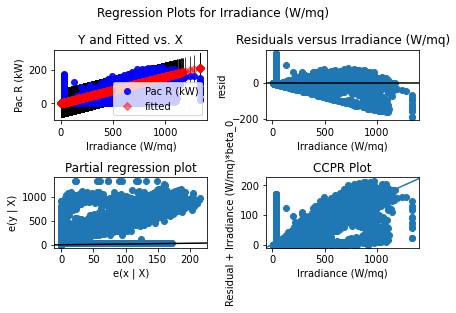

In [25]:
plot_residuals(model, 'Irradiance (W/mq)')

In [28]:
X = df_day[['Irradiance (W/mq)', 'Amb. Temp (°C)']]
y = df_day['Pac R (kW)']
model = make_regression(X,y)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Pac R (kW)   R-squared (uncentered):                   0.812
Model:                            OLS   Adj. R-squared (uncentered):              0.812
Method:                 Least Squares   F-statistic:                          2.571e+04
Date:                Mon, 06 Dec 2021   Prob (F-statistic):                        0.00
Time:                        15:23:27   Log-Likelihood:                         -60950.
No. Observations:               11942   AIC:                                  1.219e+05
Df Residuals:                   11940   BIC:                                  1.219e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Irradiance (W/mq)     0.1125      0.001     86.445      0.000       0.110       0.115
Amb. Temp (°C)        1.3181      0.031     43.137      0.000       1.258       1.378
==============================================================================
Omnibus:                      771.104   Durbin-Watson:                   0.293
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2182.930
Skew:                           0.344   Prob(JB):                         0.00
Kurtosis:                       4.979   Cond. No.                         42.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1


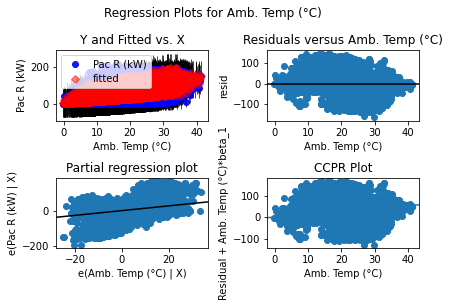

In [30]:
plot_residuals(model, 'Amb. Temp (°C)')

In [44]:
df_day['Irradiance2'] = df['Irradiance (W/mq)']^2

In [50]:
X = df_day[['Irradiance (W/mq)', 'Amb. Temp (°C)', 'Irradiance2']]
y = df_day['Pac R (kW)']
model = make_regression(X,y)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Pac R (kW)   R-squared (uncentered):                   0.812
Model:                            OLS   Adj. R-squared (uncentered):              0.812
Method:                 Least Squares   F-statistic:                          1.715e+04
Date:                Mon, 06 Dec 2021   Prob (F-statistic):                        0.00
Time:                        16:02:59   Log-Likelihood:                         -60946.
No. Observations:               11942   AIC:                                  1.219e+05
Df Residuals:                   11939   BIC:                                  1.219e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Irradiance (W/mq)     0.5936      0.182      3.256      0.001       0.236       0.951
Amb. Temp (°C)        1.3168      0.031     43.101      0.000       1.257       1.377
Irradiance2          -0.4811      0.182     -2.639      0.008      -0.838      -0.124
==============================================================================
Omnibus:                      765.819   Durbin-Watson:                   0.294
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2171.735
Skew:                           0.340   Prob(JB):                         0.00
Kurtosis:                       4.975   Cond. No.                         510.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
#plt.scatter(np.array(model.predict(X)),model.resid)

eval_env: 1


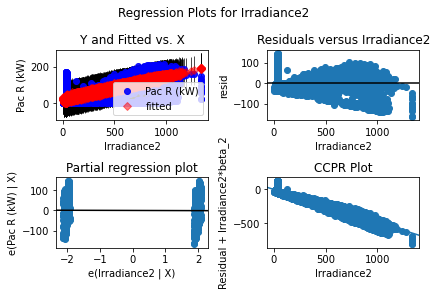

In [46]:
plot_residuals(model, 'Irradiance2')

In [ ]:
## esempio regressione pesata (non serve quì)

## Compute the weight and add it to the column named "weight_1"
df_day["weight_1"] = np.abs(model.resid.values)
df_day["weight_1"] = 1/(df_day["weight_1"])**2
model_wls_1 = sm.WLS(y, X, df_day["weight_1"])
mod_res_1 = model_wls_1.fit() 
print(mod_res_1.summary())